In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
from matplotlib import pyplot as plt

In [3]:
%matplotlib inline

1.1 Background

A commercial success movie not only entertains audience, but also enables film companies to gain tremendous profit. A lot of factors such as good directors, experienced actors are considerable for creating good movies. However, famous directors and actors can always bring an expected box-office income but cannot guarantee a highly rated imdb score.

1.2 Data Description

The dataset is from Kaggle website. It contains 28 variables for 5043 movies, spanning across 100 years in 66 countries. There are 2399 unique director names, and thousands of actors/actresses. “imdb_score” is the response variable while the other 27 variables are possible predictors.

The original dataset has been replaced in Kaggle, here’s the link for the original dataset from Dataworld:

https://data.world/data-society/imdb-5000-movie-dataset

In [4]:
import os

In [5]:
os.chdir("/Users/sharukh-malik/Downloads")

In [6]:
os.getcwd()

'/Users/sharukh-malik/Downloads'

In [7]:
df = pd.read_csv("movie_metadata.csv")

In [8]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [9]:
director_IM = df.groupby("director_name").agg({"imdb_score":"mean"}).reset_index().sort_values(by = "imdb_score")

In [10]:
director_IM.head(10).director_name

1352     Lawrence Kasanoff
0            A. Raven Cruz
723      Frédéric Auburtin
2326    Vondie Curtis-Hall
773         Georgia Hilton
57               Alex Zamm
1963       Roger Christian
1830     Rachel Goldenberg
1066            Joe Marino
966        Jason Friedberg
Name: director_name, dtype: object

/var/folders/gp/q35fhh7x7ld625zg0w3z4tkm0000gn/T/ipykernel_12604/3635608648.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(director_IM.head(10).director_name, rotation=45)
/var/folders/gp/q35fhh7x7ld625zg0w3z4tkm0000gn/T/ipykernel_12604/3635608648.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(director_IM.tail(10).director_name, rotation=45)


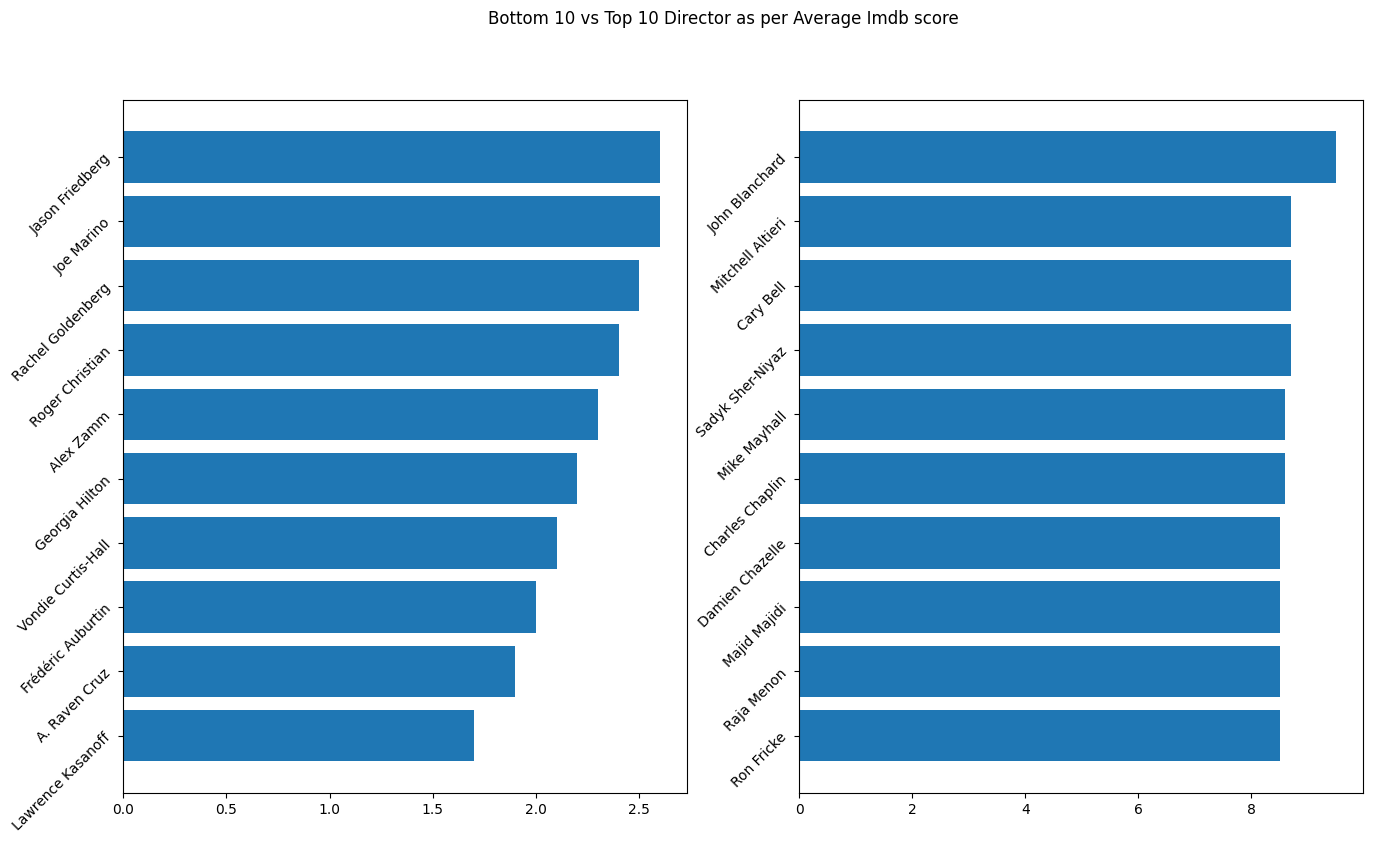

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9))

ax1.set_yticklabels(director_IM.head(10).director_name, rotation=45)
ax2.set_yticklabels(director_IM.tail(10).director_name, rotation=45)
fig.suptitle("Bottom 10 vs Top 10 Director as per Average Imdb score")
ax1.barh(director_IM.head(10).director_name, director_IM.head(10).imdb_score)
ax2.barh(director_IM.tail(10).director_name, director_IM.tail(10).imdb_score)
plt.show()

In [12]:
df.title_year.describe()

count    4935.000000
mean     2002.470517
std        12.474599
min      1916.000000
25%      1999.000000
50%      2005.000000
75%      2011.000000
max      2016.000000
Name: title_year, dtype: float64

#### movie data starts from 1916 and avaialble till 2016

Feature Engineering
Recommendation will be based on these features only:

director
leading actors
genres
movie_title

In [13]:
data = df.loc[:,['director_name', 'actor_2_name', 'genres', 'actor_1_name','movie_title','actor_3_name']]

In [14]:
data

,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name
0,James Cameron,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi
1,Gore Verbinski,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport
2,Sam Mendes,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman
3,Christopher Nolan,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt
4,Doug Walker,Rob Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN
...,...,...,...,...,...,...
5038,Scott Smith,Daphne Zuniga,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,Crystal Lowe
5039,NaN,Valorie Curry,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,Sam Underwood
5040,Benjamin Roberds,Maxwell Moody,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,David Chandler
5041,Daniel Hsia,Daniel Henney,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,Eliza Coupe


In [15]:
data.isnull().sum()

director_name    104
actor_2_name      13
genres             0
actor_1_name       7
movie_title        0
actor_3_name      23
dtype: int64

In [16]:
# handle blank column by replacing nan value by "unknown"

In [17]:
data["director_name"] = data["director_name"].replace(np.nan, "unknown")
data["actor_1_name"] = data["actor_1_name"].replace(np.nan, "unknown")
data["actor_2_name"] = data["actor_2_name"].replace(np.nan, "unknown")
data["actor_3_name"] = data["actor_3_name"].replace(np.nan, "unknown")



In [18]:
data.isnull().sum()

director_name    0
actor_2_name     0
genres           0
actor_1_name     0
movie_title      0
actor_3_name     0
dtype: int64

In [19]:
data["genres"] = data["genres"].str.replace("|", " ")

In [20]:
data.sample(10)

,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name
4193,Alice Wu,Ato Essandoh,Comedy Drama Romance,Joan Chen,Saving Face,Jessica Hecht
4743,Neema Barnette,LisaRaye McCoy,Crime Drama Thriller,Monica Calhoun,Civil Brand,Clifton Powell
1176,Jean-Pierre Jeunet,Dany Boon,Action Comedy Crime,Omar Sy,Micmacs,André Dussollier
2619,John Carpenter,Donald Pleasence,Horror Thriller,Jamie Lee Curtis,Halloween,P.J. Soles
2444,Jeff Kanew,Shelley Long,Adventure Comedy,Craig T. Nelson,Troop Beverly Hills,Kellie Martin
3436,Stanley Tong,Anita Mui,Action Comedy,Françoise Yip,Rumble in the Bronx,Garvin Cross
3452,Paul Haggis,Loretta Devine,Crime Drama Thriller,Don Cheadle,Crash,Jennifer Esposito
2831,Jonathan Glazer,Paul Brannigan,Drama Horror Sci-Fi Thriller,Scarlett Johansson,Under the Skin,Alison Chand
2480,Terry George,Sophie Okonedo,Drama History War,Don Cheadle,Hotel Rwanda,Hakeem Kae-Kazim
849,Wayne Wang,Frances Conroy,Comedy Drama Romance,Bob Hoskins,Maid in Manhattan,Natasha Richardson


In [21]:
data['movie_title'] = data['movie_title'].str.lower()

#### we have extra string "\xa0" at the end of each movie title. Let's remove it

In [22]:
data['movie_title'] = data['movie_title'].apply(lambda x : x[:-1])

In [23]:
data['movie_title'][2]

'spectre'

movies_metadata.csv: The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

credits.csv: Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.

In [24]:
credit = pd.read_csv("credits.csv")

In [25]:
credit.id

0           862
1          8844
2         15602
3         31357
4         11862
          ...  
45471    439050
45472    111109
45473     67758
45474    227506
45475    461257
Name: id, Length: 45476, dtype: int64

In [26]:
credit.id = credit.id.astype(int)

In [97]:
credit.sample(10)

,cast,crew,id
39724,"[{'cast_id': 3, 'character': 'Guy Burgess', 'credit_id': '52fe4a4dc3a36...","[{'credit_id': '52fe4a4dc3a368484e14bcef', 'department': 'Directing', '...",120729
14550,"[{'cast_id': 7, 'character': 'Detective Sergeant Johnson', 'credit_id':...","[{'credit_id': '52fe44de9251416c9101f8a9', 'department': 'Directing', '...",32615
10510,"[{'cast_id': 1, 'character': 'Flama', 'credit_id': '52fe455c9251416c910...","[{'credit_id': '52fe455c9251416c9102f9db', 'department': 'Directing', '...",34207
57,"[{'cast_id': 11, 'character': 'Pablo Neruda', 'credit_id': '52fe43e2925...","[{'credit_id': '52fe43e29251416c75021d97', 'department': 'Directing', '...",11010
13680,"[{'cast_id': 5, 'character': 'Lt. Col. Barney Adams', 'credit_id': '52f...","[{'credit_id': '52fe4b01c3a36847f81ed2f7', 'department': 'Directing', '...",111752
1083,"[{'cast_id': 3, 'character': 'Julie', 'credit_id': '52fe461f9251416c910...","[{'credit_id': '57c3dc12c3a3683cb2000d4a', 'department': 'Production', ...",36998
23141,"[{'cast_id': 4, 'character': 'Sofie', 'credit_id': '52fe4b989251416c751...","[{'credit_id': '52fe4b989251416c75108007', 'department': 'Directing', '...",146955
42328,"[{'cast_id': 1, 'character': 'Antonin Verset', 'credit_id': '53ab2d4f0e...","[{'credit_id': '538377ee0e0a26588c008628', 'department': 'Directing', '...",58928
16547,"[{'cast_id': 1, 'character': 'Vince Holland', 'credit_id': '52fe473bc3a...","[{'credit_id': '52fe473bc3a36847f812a7a7', 'department': 'Directing', '...",47610
38218,"[{'cast_id': 1, 'character': 'Alladin', 'credit_id': '52fe4400c3a368484...","[{'credit_id': '52fe4400c3a368484e00a069', 'department': 'Directing', '...",20898


In [27]:
meta = pd.read_csv("movies_metadata.csv")

/var/folders/gp/q35fhh7x7ld625zg0w3z4tkm0000gn/T/ipykernel_12604/2842504488.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv("movies_metadata.csv")


In [28]:
meta.release_date = pd.to_datetime(meta["release_date"],errors="coerce")

In [29]:
meta

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaT,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [30]:
meta['year'] = meta['release_date'].dt.year

In [31]:
meta["year"].value_counts().sort_index()

year
1874.0       1
1878.0       1
1883.0       1
1887.0       1
1888.0       2
          ... 
2015.0    1905
2016.0    1604
2017.0     532
2018.0       5
2020.0       1
Name: count, Length: 135, dtype: int64

In [32]:
# In meta dataset Extract 'genres','id','title','year' of 2017 movies
new_meta=meta.loc[meta.year==2017,['genres','id','title','year']]
new_meta.head()

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0


In [33]:
new_meta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 26560 to 45465
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   genres  532 non-null    object 
 1   id      532 non-null    object 
 2   title   532 non-null    object 
 3   year    532 non-null    float64
dtypes: float64(1), object(3)
memory usage: 20.8+ KB


In [34]:
new_meta.year = new_meta.year.astype(int)

In [35]:
new_meta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 26560 to 45465
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   genres  532 non-null    object
 1   id      532 non-null    object
 2   title   532 non-null    object
 3   year    532 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 20.8+ KB


In [36]:
pd.set_option('display.max_colwidth', 75)

Combining the credit data file to extract the cast data and cred data odf actors and director

In [40]:
data1 = pd.concat([new_meta, credit], axis =  1, join = "inner")

In [41]:
data1

,genres,id,title,year,cast,crew,id
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': ...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017,"[{'cast_id': 2, 'character': 'Mario Colella', 'credit_id': '52fe48c7c3a...","[{'credit_id': '5745ddb792514129a0002fcc', 'department': 'Editing', 'ge...",74379
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",141052,Justice League,2017,"[{'cast_id': 5, 'character': ""Scarface' Manzari"", 'credit_id': '52fe470...","[{'credit_id': '52fe4705c3a368484e0b0e7d', 'department': 'Writing', 'ge...",65320
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",284053,Thor: Ragnarok,2017,"[{'cast_id': 2, 'character': 'Hache', 'credit_id': '52fe4ac1c3a36847f81...","[{'credit_id': '52fe4ac1c3a36847f81dffa1', 'department': 'Directing', '...",109689
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",283995,Guardians of the Galaxy Vol. 2,2017,"[{'cast_id': 2, 'character': 'Max Rockatansky', 'credit_id': '52fe4933c...","[{'credit_id': '53d451210e0a262841002dd1', 'department': 'Writing', 'ge...",76341
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12...",245842,The King's Daughter,2017,"[{'cast_id': 19, 'character': 'Woo-shik', 'credit_id': '53de573f0e0a265...","[{'credit_id': '52fe478bc3a36847f813b5b5', 'department': 'Production', ...",49214
...,...,...,...,...,...,...,...
45398,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",468707,Thick Lashes of Lauri Mäntyvaara,2017,[],"[{'credit_id': '52fe4cbf9251416c751245d1', 'department': 'Directing', '...",184402
45417,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 28, ...",461297,Cop and a Half: New Recruit,2017,"[{'cast_id': 1001, 'character': 'Tolik', 'credit_id': '52fe49ea9251416c...","[{'credit_id': '52fe49ea9251416c750d781f', 'department': 'Directing', '...",97672
45437,"[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id...",455661,In a Heartbeat,2017,"[{'cast_id': 1, 'character': 'Joanna', 'credit_id': '5977c41fc3a3682cfd...","[{'credit_id': '562e344bc3a3681b5c00ab29', 'department': 'Directing', '...",365432
45453,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, '...",404604,Mom,2017,"[{'cast_id': 2, 'character': '', 'credit_id': '5497407ac3a36831b80045cb...","[{'credit_id': '52fe478dc3a36847f813bd5f', 'department': 'Directing', '...",49279


We see that genre, cast, crew are now string. But we need to extract infomation from it. So we will convert it to list.

We will use the AST library's function ast.literal_eval(x) to convert string into list.

In [43]:
# evaluates an expression node or a string containing a Python literal or container display
import ast
data1['genres'] = data1['genres'].map(lambda x: ast.literal_eval(x))
data1['cast'] = data1['cast'].map(lambda x: ast.literal_eval(x))
data1['crew'] = data1['crew'].map(lambda x: ast.literal_eval(x))

#### Replacing the Science fiction genres with Sci-fi to bring consistancy in data 

In [60]:
def make_genre_list(x):
    gen = []
    st = " "
    for i in x:
        if i.get('name') == 'Science Fiction':
            scifi = 'Sci-Fi'
            gen.append(scifi)
        else:
            gen.append(i.get('name'))
    if gen == []:
        return np.NaN
    else:
        return (st.join(gen))

In [69]:
data1['genres_list'] = data1['genres'].map(lambda x: make_genre_list(x))

In [70]:
data1['genres_list']

26560    Adventure Action Fantasy Comedy
26561    Action Adventure Fantasy Sci-Fi
26565    Action Adventure Fantasy Sci-Fi
26566     Action Adventure Comedy Sci-Fi
30536           Fantasy Action Adventure
                      ...               
45398                     Romance Comedy
45417         Crime Comedy Action Family
45437    Family Animation Romance Comedy
45453               Crime Drama Thriller
45465                                NaN
Name: genres_list, Length: 532, dtype: object

#### Extracting the Director and actor data from json structure column

In [73]:
def get_actor1(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == []:
        return np.NaN
    else:
        return (casts[0])

In [74]:
data1['actor_1_name'] = data1['cast'].map(lambda x: get_actor1(x))

In [76]:
def get_actor2(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=1:
        return np.NaN
    else:
        return (casts[1])

In [77]:
data1['actor_2_name'] = data1['cast'].map(lambda x: get_actor2(x))

In [78]:
def get_actor3(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=2:
        return np.NaN
    else:
        return (casts[2])

In [79]:
data1['actor_3_name'] = data1['cast'].map(lambda x: get_actor3(x))
data1['actor_3_name']

26560        Marino Masé
26561         Harry Baer
26565     María Valverde
26566     Nicholas Hoult
30536       Won-kwon Kim
              ...       
45398                NaN
45417    Alexey Vorobyov
45437     Krista Madison
45453                NaN
45465       Vito Cipolla
Name: actor_3_name, Length: 532, dtype: object

In [80]:
def get_directors(x):
    dt = []
    st = " "
    for i in x:
        if i.get('job') == 'Director':
            dt.append(i.get('name'))
    if dt == []:
        return np.NaN
    else:
        return (st.join(dt))
data1['director_name'] = data1['crew'].map(lambda x: get_directors(x))
data1['director_name']

26560                   Fernando Di Leo
26561                   Fernando Di Leo
26565          Fernando González Molina
26566                     George Miller
30536                            Yoo Ha
                      ...              
45398                   Walter Ruttmann
45417                      Egor Baranov
45437                      John Ainslie
45453                    Georges Méliès
45465    Paolo Taviani Vittorio Taviani
Name: director_name, Length: 532, dtype: object

Let's get only the required column for model

In [81]:
movie = data1.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres_list','title']]
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres_list,title
26560,Fernando Di Leo,Luc Merenda,James Mason,Marino Masé,Adventure Action Fantasy Comedy,Pirates of the Caribbean: Dead Men Tell No Tales
26561,Fernando Di Leo,Jack Palance,Al Cliver,Harry Baer,Action Adventure Fantasy Sci-Fi,Justice League
26565,Fernando González Molina,Mario Casas,Clara Lago,María Valverde,Action Adventure Fantasy Sci-Fi,Thor: Ragnarok
26566,George Miller,Tom Hardy,Charlize Theron,Nicholas Hoult,Action Adventure Comedy Sci-Fi,Guardians of the Galaxy Vol. 2
30536,Yoo Ha,Lee Jung-Jin,Han Ga-in,Won-kwon Kim,Fantasy Action Adventure,The King's Daughter
...,...,...,...,...,...,...
45398,Walter Ruttmann,NaN,NaN,NaN,Romance Comedy,Thick Lashes of Lauri Mäntyvaara
45417,Egor Baranov,Evgeniy Stychkin,Yuriy Kutsenko,Alexey Vorobyov,Crime Comedy Action Family,Cop and a Half: New Recruit
45437,John Ainslie,Tianna Nori,Mark Matechuk,Krista Madison,Family Animation Romance Comedy,In a Heartbeat
45453,Georges Méliès,Georges Méliès,NaN,NaN,Crime Drama Thriller,Mom


In [82]:
movie.isnull().sum()

director_name    19
actor_1_name     38
actor_2_name     76
actor_3_name     94
genres_list       8
title             0
dtype: int64

In [83]:
movie["director_name"] = movie["director_name"].replace(np.nan, "unknown")
movie["actor_1_name"] = movie["actor_1_name"].replace(np.nan, "unknown")
movie["actor_2_name"] = movie["actor_2_name"].replace(np.nan, "unknown")
movie["actor_3_name"] = movie["actor_3_name"].replace(np.nan, "unknown")

In [84]:
movie = movie.dropna(how='any')
movie.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres_list      0
title            0
dtype: int64

#### renaming the columns of meta file to bring consitancy for whole dataset

In [85]:
movie = movie.rename(columns={'genres_list':'genres'})
movie = movie.rename(columns={'title':'movie_title'})
movie['movie_title'] = movie['movie_title'].str.lower()

In [91]:
movie["movie_title"][:2]

26560    pirates of the caribbean: dead men tell no tales
26561                                      justice league
Name: movie_title, dtype: object

### concat the old and newly extracted data into one dataframe after all transformation

In [93]:
dataset = pd.concat([data, movie], axis = 0)

In [94]:
dataset

,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name
0,James Cameron,Joel David Moore,Action Adventure Fantasy Sci-Fi,CCH Pounder,avatar,Wes Studi
1,Gore Verbinski,Orlando Bloom,Action Adventure Fantasy,Johnny Depp,pirates of the caribbean: at world's end,Jack Davenport
2,Sam Mendes,Rory Kinnear,Action Adventure Thriller,Christoph Waltz,spectre,Stephanie Sigman
3,Christopher Nolan,Christian Bale,Action Thriller,Tom Hardy,the dark knight rises,Joseph Gordon-Levitt
4,Doug Walker,Rob Walker,Documentary,Doug Walker,star wars: episode vii - the force awakens,unknown
...,...,...,...,...,...,...
45391,Svyatoslav Podgayevskiy,Dmitri Yendaltsev,Romance,Mariya Fomina,can't buy my love,Boris Polunin
45398,Walter Ruttmann,unknown,Romance Comedy,unknown,thick lashes of lauri mäntyvaara,unknown
45417,Egor Baranov,Yuriy Kutsenko,Crime Comedy Action Family,Evgeniy Stychkin,cop and a half: new recruit,Alexey Vorobyov
45437,John Ainslie,Mark Matechuk,Family Animation Romance Comedy,Tianna Nori,in a heartbeat,Krista Madison
